In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#For a new user that needs to install
#!pip install wrapt --upgrade --ignore-installed
#!pip install tensorflow-gpu
#!pip install keras

In [3]:
import csv
import time
import sys
import os 

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
#put your path in possible_paths 
possible_paths = ["..\\utils\\", "../../utils/"]
for path in possible_paths:
    if os.path.isdir(path):
        utils_path = path
        
sys.path.insert(0, utils_path)   
sys.path.insert(0, utils_path)  

import utils as ut
import fancyplots as fp
from regr_models import neuralNewtorkRegression

In [5]:
#When a library is updated, run
import importlib
importlib.reload(ut)

<module 'utils' from '/home/simone/repos/IPAM2021_ML/algo/NN_tf/../../utils/utils.py'>

## Input options

In [6]:
# training options
write_output     = False
remove_some_mass = False
epochs           = 100
validation_split = 0.2
batch_size       = 128
verbose_training = False
hlayers_sizes    = (100,);
learning_rate    = 0.001
scaler_type      = 'minmax' # standard, minmax, mixed
hidden_activation= 'relu'
out_activation   = 'linear' # sigmoid, linear, linear_cut, linear_cut_T3, linear_cut_lb, linear_cut_mod
loss_function    = 'mse'
Lambda_mse       = 1        # used if loss_function has a q-penalty (e.g. 'mse_q')
Lambda_q         = 100        
Lambda_Mc        = 3

show_SVR      = False
show_2m       = False
show_p1Mctest = False 
show_p2Mctest = False 
show_p3stest  = False 
show_McTmtest = False
show_Mcmutest = True
show_smutest  = False
show_Mcqtest  = False #DONT
show_Mcnutest = False #DONT

#Options added
show_plots = True
save_plots = False

# data paths
regr_data_dirs = ["../../datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/",
                  "..\\GSTLAL_EarlyWarning_Dataset\\Dataset\\m1m2Mc\\"]
for path in regr_data_dirs:
    if os.path.isdir(path):
        regr_data_dir = path
        print(path)

../../datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/


## Load dataset and visualize it

In [7]:
# load data
features_names       = ['m1', 'm2', 'Mc']
data_paths           = {}
data_paths['xtrain'] = regr_data_dir+'xtrain.csv'
data_paths['ytrain'] = regr_data_dir+'ytrain.csv'
data_paths['xtest']  = regr_data_dir+'xtest.csv'
data_paths['ytest']  = regr_data_dir+'ytest.csv'

rdl_out = ut.regressionDatasetLoader(data_paths, features_names,
                       remove_some_mass=remove_some_mass,
                       scaler_type=None)
xtrain_notnormalized = rdl_out['xtrain']
ytrain_notnormalized = rdl_out['ytrain']
xtest_notnormalized  = rdl_out['xtest']
ytest_notnormalized  = rdl_out['ytest']
labels               = rdl_out['labels']

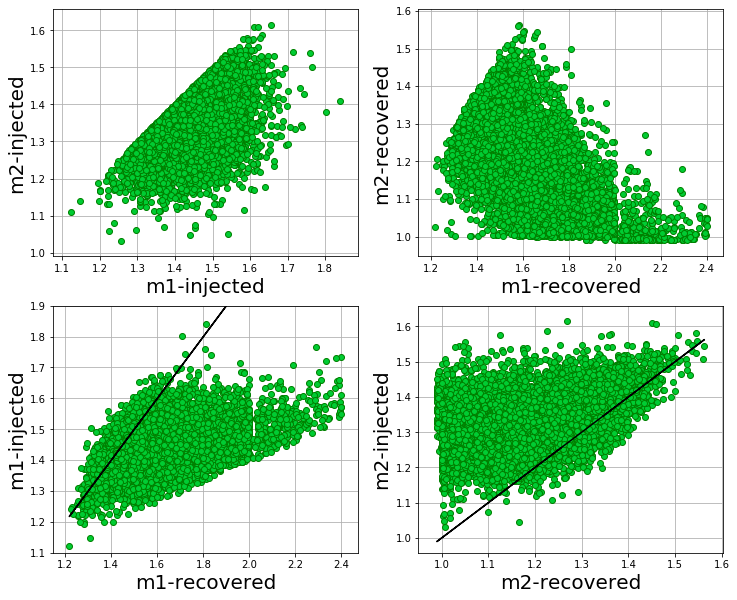

In [8]:
m1_rec = xtest_notnormalized[:,0]
m2_rec = xtest_notnormalized[:,1]
Mc_rec = xtest_notnormalized[:,2]
m1_inj = ytest_notnormalized[:,0]
m2_inj = ytest_notnormalized[:,1]
Mc_inj = ytest_notnormalized[:,2]

plt.rc('axes', axisbelow=True)
plt.figure('figsize',(12,10))
plt.subplot(2,2,1)
plt.grid(visible=True)
plt.scatter(m1_inj, m2_inj, facecolor=[0,0.8,0.2], edgecolor='g')
plt.xlabel('m1-injected', fontsize=20)
plt.ylabel('m2-injected', fontsize=20)

plt.subplot(2,2,2)
plt.grid(visible=True)
plt.scatter(m1_rec, m2_rec, facecolor=[0,0.8,0.2], edgecolor='g')
plt.xlabel('m1-recovered', fontsize=20)
plt.ylabel('m2-recovered', fontsize=20)

plt.subplot(2,2,3)
plt.grid(visible=True)
plt.scatter(m1_rec, m1_inj, facecolor=[0,0.8,0.2], edgecolor='g')
plt.plot(m1_rec,m1_rec, 'k')
plt.xlabel('m1-recovered', fontsize=20)
plt.ylabel('m1-injected', fontsize=20)
plt.ylim([1.1, 1.9])

plt.subplot(2,2,4)
plt.grid(visible=True)
plt.scatter(m2_rec, m2_inj, facecolor=[0,0.8,0.2], edgecolor='g')
plt.plot(m2_rec, m2_rec, 'k')
plt.xlabel('m2-recovered', fontsize=20)
plt.ylabel('m2-injected', fontsize=20)

plt.show()

## Train and test the model: just throw all into a NN

********************************************************************************
Layers: 100 
trainable pramaters: 703
train time: 13.370
********************************************************************************

Final loss     : 0.01058
Final R2 mean  : 0.83856
R2[ 0]         : 0.73479
R2[ 1]         : 0.78095
R2[ 2]         : 0.99995


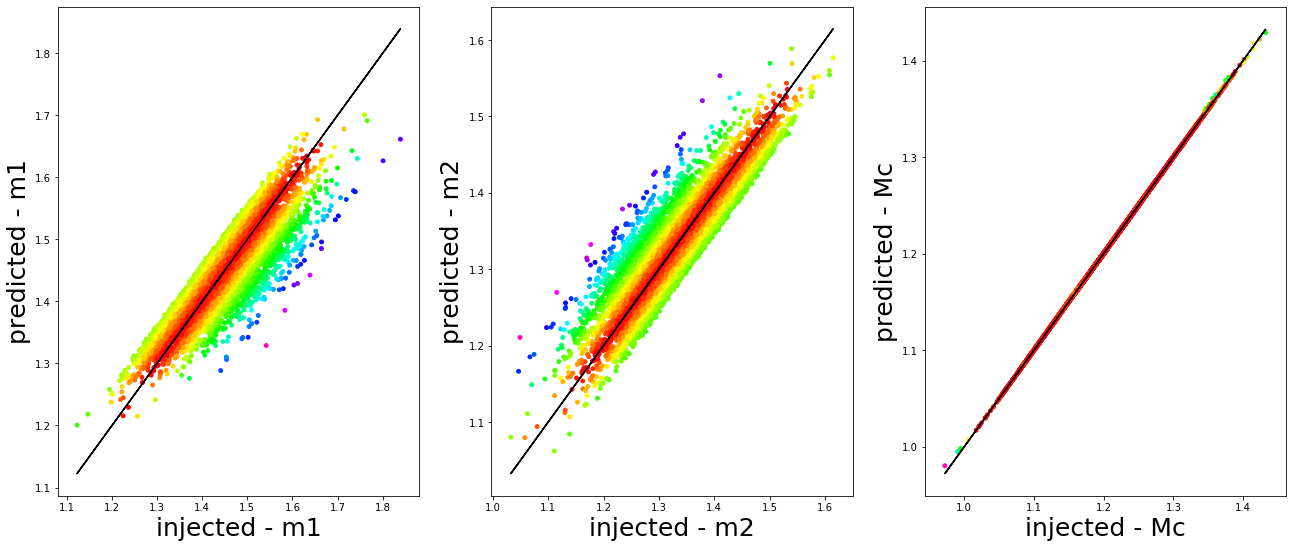

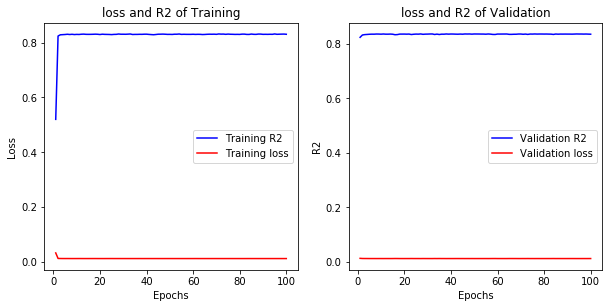

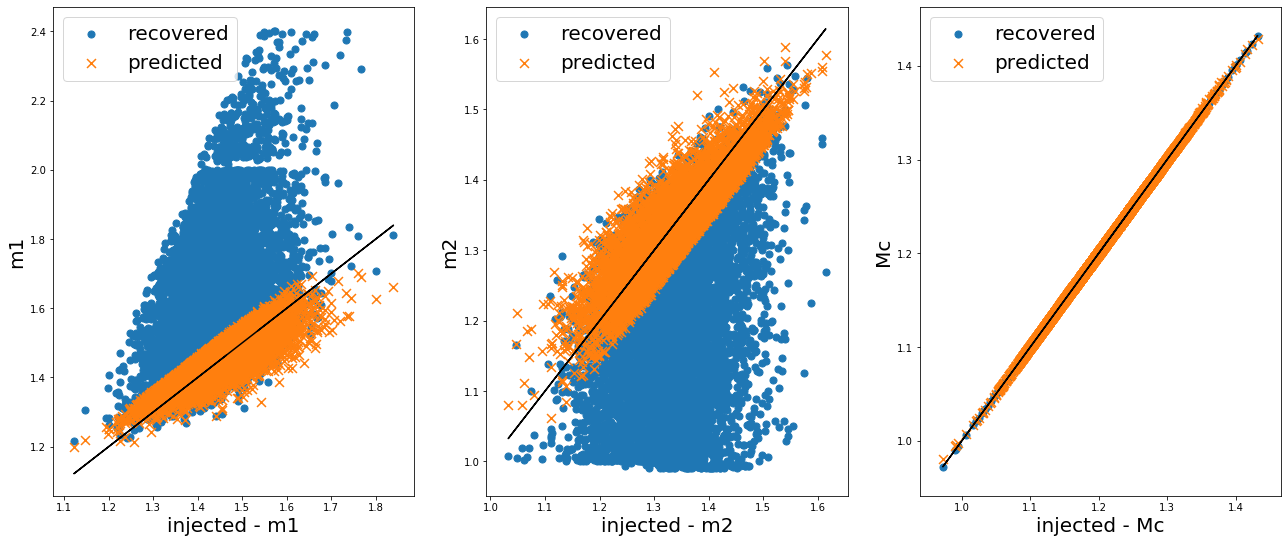

********************************************************************************
m1 vs m2: injected, recovered, predicted
********************************************************************************


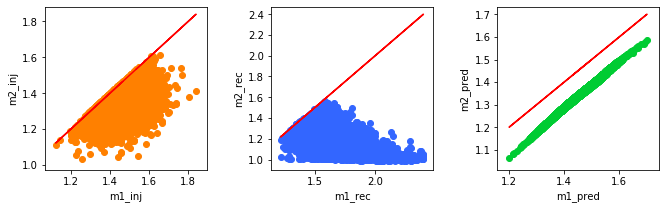

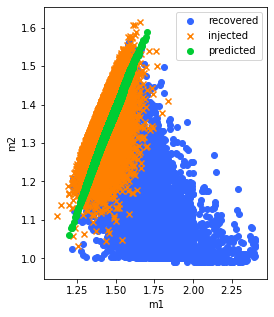

********************************************************************************
m1 vs q: injected, recovered, predicted (indirectly)
********************************************************************************


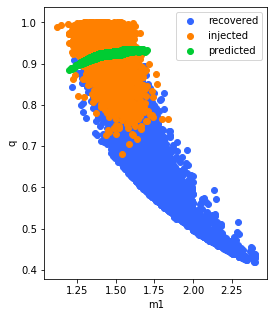

********************************************************************************
m1 vs Mc: injected, recovered, predicted
********************************************************************************


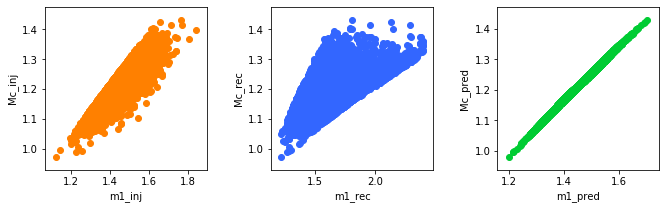

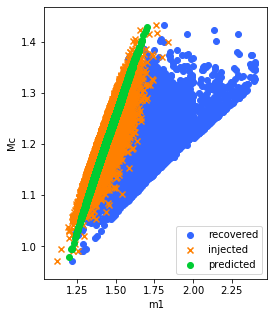

-----------------------------
m1 mean error: 0.023122883494708108
m2 mean error: 0.02262341250253788
Mc mean error: 0.0002538270686480676
q  mean error: 0.046007127960502804


In [9]:
# train model
t0 = time.perf_counter()
outNN = neuralNewtorkRegression(xtrain_notnormalized, ytrain_notnormalized,
            scaler_type       = scaler_type,                   
            epochs            = epochs, 
            batch_size        = batch_size, 
            learning_rate     = learning_rate,          
            validation_split  = validation_split,   
            verbose           = verbose_training,             
            hlayers_sizes     = hlayers_sizes,          
            out_activation    = out_activation,        
            hidden_activation = hidden_activation,
            loss_function     = loss_function,
            Lambda_mse        = Lambda_mse, 
            Lambda_q          = Lambda_q,
            Lambda_Mc         = Lambda_Mc)
train_time = time.perf_counter()-t0

model    = outNN["model"]
history  = outNN["history"]
Npars    = outNN["Npars"]
scaler_x = outNN["scaler_x"]
scaler_y = outNN["scaler_y"]

xtest = scaler_x.transform(xtest_notnormalized)
ytest = scaler_y.transform(ytest_notnormalized)

# predict
ypredicted = model.predict(xtest)

# print some information
metrics_dict = ut.evalutationMetricsDict(xtest,ytest,model)

# show plots and print info
asterisks = '*'*80
print(asterisks)
print('Layers: ', end='')
for layer in hlayers_sizes:
    print(layer,end=' ')
print('\ntrainable pramaters: ', Npars, \
      '\ntrain time: {:.3f}'.format(train_time), '\n', \
      asterisks, sep='', end='\n')
ut.printMetrics(metrics_dict)

# save info/score/model in the dictionary
dict1                     = lambda:0
dict1.Npars               = Npars
dict1.metrics             = metrics_dict
dict1.train_time          = train_time
dict1.Nlayers             = len(hlayers_sizes)
dict1.hlayers_sizes       = hlayers_sizes
dict1.epochs              = epochs
dict1.batch_size          = batch_size
dict1.scaler_type         = scaler_type
dict1.out_activation      = out_activation
dict1.hidden_activation   = hidden_activation
dict1.learning_rate       = learning_rate
dict1.prediction          = ypredicted
dict1.prediction_rescaled = scaler_y.inverse_transform(ypredicted)
dict1.loss_function       = loss_function
dict1.scaler_x            = scaler_x
dict1.scaler_y            = scaler_y
dict1.model               = model
dict1.history             = history

# plots
fp.regrPredictionPlots(ytest, ypredicted, labels, scaler=scaler_y)
fp.plotHistory(history)
fp.checkRegressionPlot(xtest, ytest, ypredicted, labels, \
                   scaler_y=scaler_y, scaler_x=scaler_x)
fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                  dict1.prediction_rescaled, idx_Mc=2)

# mean errors 
m1_inj  = ytest_notnormalized[:,0]
m2_inj  = ytest_notnormalized[:,1]
Mc_inj  = ytest_notnormalized[:,2]
m1_pred = dict1.prediction_rescaled[:,0]
m2_pred = dict1.prediction_rescaled[:,1]
Mc_pred = dict1.prediction_rescaled[:,2]
q_inj   = m2_inj /m1_inj
q_pred  = m2_pred/m1_pred
m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
print('-----------------------------')
print('m1 mean error:', m1_mean_error)
print('m2 mean error:', m2_mean_error)
print('Mc mean error:', Mc_mean_error)
print('q  mean error:', q_mean_error)

## Try predicting Mc,m2 and computing m1 (spoiler: nothing changes)

In [10]:
if show_2m:
    xtrain_notnormalized_d2 = rdl_out['xtrain'][:,1:3]
    ytrain_notnormalized_d2 = rdl_out['ytrain'][:,1:3]
    xtest_notnormalized_d2  = rdl_out['xtest'][:,1:3]
    ytest_notnormalized_d2  = rdl_out['ytest'][:,1:3]
    labels_d2               = rdl_out['labels'][1:3]

    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnormalized_d2, ytrain_notnormalized_d2,
                scaler_type       = scaler_type,                   
                epochs            = epochs, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = 'mse'
            )
    train_time = time.perf_counter()-t0

    model_d2    = outNN["model"]
    history_d2  = outNN["history"]
    Npars_d2    = outNN["Npars"]
    scaler_x_d2 = outNN["scaler_x"]
    scaler_y_d2 = outNN["scaler_y"]

    xtest_d2 = scaler_x_d2.transform(xtest_notnormalized_d2)
    ytest_d2 = scaler_y_d2.transform(ytest_notnormalized_d2)

    # predict
    ypredicted_d2 = model_d2.predict(xtest_d2)

    # print some information
    metrics_dict_d2 = ut.evalutationMetricsDict(xtest_d2,ytest_d2,model_d2)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes:
        print(layer,end=' ')
    print('\ntrainable pramaters: ', Npars_d2, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_d2)

    # save info/score/model in the dictionary
    dict2                     = lambda:0
    dict2.Npars               = Npars_d2
    dict2.metrics             = metrics_dict_d2
    dict2.train_time          = train_time
    dict2.Nlayers             = len(hlayers_sizes)
    dict2.hlayers_sizes       = hlayers_sizes
    dict2.epochs              = epochs
    dict2.batch_size          = batch_size
    dict2.scaler_type         = scaler_type
    dict2.out_activation      = out_activation
    dict2.hidden_activation   = hidden_activation
    dict2.learning_rate       = learning_rate
    dict2.prediction          = ypredicted_d2
    dict2.prediction_rescaled = scaler_y_d2.inverse_transform(ypredicted_d2)
    dict2.loss_function       = 'mse'
    dict2.scaler_x            = scaler_x_d2
    dict2.scaler_y            = scaler_y_d2
    dict2.model               = model_d2
    dict2.history             = history_d2
    
    # plots
    fp.regrPredictionPlots(ytest_d2, ypredicted_d2, labels_d2, scaler=scaler_y_d2)
    fp.plotHistory(history_d2)
    fp.checkRegressionPlot(xtest_d2, ytest_d2, ypredicted_d2, labels_d2, \
                       scaler_y=scaler_y_d2, scaler_x=scaler_x_d2)

    m2_pred = dict2.prediction_rescaled[:,0]
    Mc_pred = dict2.prediction_rescaled[:,1]
    m1_pred = ut.findSecondMassFromMc(Mc_pred,m2_pred)

    prediction_d2 = np.column_stack((m1_pred, m2_pred, Mc_pred))

    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, prediction_d2, \
                      idx_Mc=2)

## Try regression with SVR

In [11]:
if show_SVR:
    C   = 10
    eps = 0.001;

    Ntest     = len(xtest_notnormalized)
    Nfeatures = len(xtrain_notnormalized[0,:])

    ypredicted_SVR = np.zeros((Ntest, Nfeatures))
    scores = np.zeros(Nfeatures)
    regres = []
    t0 = time.perf_counter()
    for i in range(0,Nfeatures):
            ytrain_SVR_1d = ytrain_notnormalized[:,i]
            regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=C, epsilon=eps))
            regr.fit(xtrain_notnormalized, ytrain_SVR_1d)
            ytest_SVR_1d  = ytest_notnormalized[:,i]
            scores[i] = regr.score(xtest_notnormalized, ytest_SVR_1d)
            regres.append(regr)
            print('score #{:1d}: {:.5f}'.format(i, scores[i]))
            ypredicted_SVR[:,i] = regr.predict(xtest_notnormalized)
    train_time = time.perf_counter()-t0

    dict_SVR                     = lambda:0
    dict_SVR.train_time          = train_time
    dict_SVR.prediction_rescaled = ypredicted_SVR
    dict_SVR.scores              = scores

    # plots
    fp.regrPredictionPlots(ytest_notnormalized, ypredicted_SVR, labels)
    fp.checkRegressionPlot(xtest_notnormalized, ytest_notnormalized, \
                           ypredicted_SVR, labels)
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      ypredicted_SVR, idx_Mc=2)

## More plots...

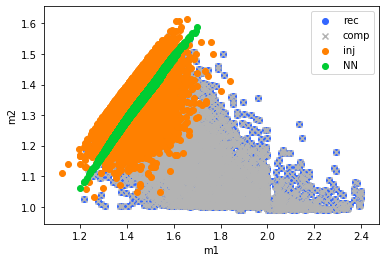

In [12]:
m1_inj = ytest_notnormalized[:,0]
m2_inj = ytest_notnormalized[:,1]
Mc_inj = ut.chirpMass(m1_inj, m2_inj)

m1_rec = xtest_notnormalized[:,0]
m2_rec = xtest_notnormalized[:,1]
if len(xtest_notnormalized[0,:])>2:
    Mc_rec = xtest_notnormalized[:,2]
else:
    Mc_rec = ut.chirpMass(m1_rec, m2_rec)
    
m2_comp = ut.findSecondMassFromMc(Mc_rec, m1_rec)

m1_pred_NN  = dict1.prediction_rescaled[:,0]
m2_pred_NN  = dict1.prediction_rescaled[:,1]

if show_SVR:
    m1_pred_SVR = dict_SVR.prediction_rescaled[:,0]
    m2_pred_SVR = dict_SVR.prediction_rescaled[:,1]

plt.figure
plt.scatter(m1_rec, m2_rec,  marker='o', label='rec', color=[0.2,0.4,1])
plt.scatter(m1_rec, m2_comp, marker='x', label='comp', color=[0.7,0.7,0.7])
plt.scatter(m1_inj, m2_inj,  label='inj', color=[1,0.5,0])
if show_SVR:
    plt.scatter(m1_pred_SVR, m2_pred_SVR, label='SVR', marker='x', color=[1,0,0])
plt.scatter(m1_pred_NN,  m2_pred_NN,  label='NN', color=[0,0.8,0.2])
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.show()

## p=(m1m2)^1, Mc attempt

In [13]:
if show_p1Mctest:
    epochs_fp        = epochs
    pcoeff           = 1
    loss_function_fp = 'mse'
    hlayers_sizes_fp = hlayers_sizes
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    
    xtrain_notnorm_fp[:,0] = (m1_rec_train*m2_rec_train)**pcoeff
    xtrain_notnorm_fp[:,1] = xtrain_notnormalized[:,2]
    ytrain_notnorm_fp[:,0] = (m1_inj_train*m2_inj_train)**pcoeff
    ytrain_notnorm_fp[:,1] = ytrain_notnormalized[:,2]
    xtest_notnorm_fp[:,0]  = (m1_rec_test*m2_rec_test)**pcoeff
    xtest_notnorm_fp[:,1]  = xtest_notnormalized[:,2]
    ytest_notnorm_fp[:,0]  = (m1_inj_test*m2_inj_test)**pcoeff
    ytest_notnorm_fp[:,1]  = ytest_notnormalized[:,2]
    
    labels_fp = ['p'+str(pcoeff), 'Mc']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)

    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes:
        print(layer,end=' ')
    print('\ntrainable pramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp
    
    # plots
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp)
    fp.plotHistory(history_fp)
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp)

    p_pred  = (dict4.prediction_rescaled[:,0])**(1/pcoeff)
    Mc_pred = dict4.prediction_rescaled[:,1]
    m1_pred, _ = ut.findm1m2FrompMc_Mod(p_pred,Mc_pred)
    
    # now enforce consistency between m1,m2 and Mc
    m2_pred = ut.findSecondMassFromMc(Mc_pred, m1_pred)
    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2)
    
    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
          pcoeff, '\n', asterisks, sep='')
    plt.figure
    plt.subplot(1,2,1)
    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
    plt.xlabel('injected - m1')
    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
    plt.legend()
    plt.subplot(1,2,2)
    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
    plt.xlabel('injected - m2')
    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
    plt.legend()
    plt.subplots_adjust(wspace=0.4)
    plt.show()

    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
    plt.figure
    plt.subplot(1,2,1)
    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
    plt.scatter(ytest_notnormalized[:,0], dict1.prediction_rescaled[:,0], label='predicted')
    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
    plt.xlabel('injected - m1')
    plt.ylabel('m1 - GstLAL standard')
    plt.legend()
    plt.subplot(1,2,2)
    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
    plt.scatter(ytest_notnormalized[:,1], dict1.prediction_rescaled[:,1], label='predicted')
    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
    plt.xlabel('injected - m2')
    plt.ylabel('m2 - GstLAL standard')
    plt.legend()
    plt.subplots_adjust(wspace=0.4)
    plt.show()
    
    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)
    
    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)

## p=(m1m2)^2, Mc attempt

In [14]:
if show_p2Mctest:
    epochs_fs        = 100
    scoeff           = 2
    loss_function_fs = 'mse'
    hlayers_sizes_fs = (100,)
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fs = np.zeros((Ntrain,2))
    ytrain_notnorm_fs = np.zeros((Ntrain,2))
    xtest_notnorm_fs  = np.zeros((Ntest,2))
    ytest_notnorm_fs  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    
    xtrain_notnorm_fs[:,0] = (m1_rec_train+m2_rec_train)**scoeff
    xtrain_notnorm_fs[:,1] = xtrain_notnormalized[:,2]
    ytrain_notnorm_fs[:,0] = (m1_inj_train+m2_inj_train)**scoeff
    ytrain_notnorm_fs[:,1] = ytrain_notnormalized[:,2]
    xtest_notnorm_fs[:,0]  = (m1_rec_test+m2_rec_test)**scoeff
    xtest_notnorm_fs[:,1]  = xtest_notnormalized[:,2]
    ytest_notnorm_fs[:,0]  = (m1_inj_test+m2_inj_test)**scoeff
    ytest_notnorm_fs[:,1]  = ytest_notnormalized[:,2]
    
    labels_fs = ['fs', 'Mc']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fs, ytrain_notnorm_fs,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fs, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fs,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fs
            )
    train_time = time.perf_counter()-t0

    model_fs    = outNN["model"]
    history_fs  = outNN["history"]
    Npars_fs    = outNN["Npars"]
    scaler_x_fs = outNN["scaler_x"]
    scaler_y_fs = outNN["scaler_y"]

    xtest_fs = scaler_x_fs.transform(xtest_notnorm_fs)
    ytest_fs = scaler_y_fs.transform(ytest_notnorm_fs)

    # predict
    ypredicted_fs = model_fs.predict(xtest_fs)

    # print some information
    metrics_dict_fs = ut.evalutationMetricsDict(xtest_fs,ytest_fs,model_fs)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes:
        print(layer,end=' ')
    print('\ntrainable pramaters: ', Npars_fs, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fs)

    # save info/score/model in the dictionary
    dict5                     = lambda:0
    dict5.Npars               = Npars_fs
    dict5.metrics             = metrics_dict_fs
    dict5.train_time          = train_time
    dict5.Nlayers             = len(hlayers_sizes)
    dict5.hlayers_sizes       = hlayers_sizes_fs
    dict5.epochs              = epochs_fs
    dict5.batch_size          = batch_size
    dict5.scaler_type         = scaler_type
    dict5.out_activation      = out_activation
    dict5.hidden_activation   = hidden_activation
    dict5.learning_rate       = learning_rate
    dict5.prediction          = ypredicted_fs
    dict5.prediction_rescaled = scaler_y_fs.inverse_transform(ypredicted_fs)
    dict5.loss_function       = loss_function_fs
    dict5.scaler_x            = scaler_x_fs
    dict5.scaler_y            = scaler_y_fs
    dict5.model               = model_fs
    dict5.history             = history_fs
    
    # plots
    fp.regrPredictionPlots(ytest_fs, ypredicted_fs, labels_fs, scaler=scaler_y_fs)
    fp.plotHistory(history_fs)
    fp.checkRegressionPlot(xtest_fs, ytest_fs, ypredicted_fs, labels_fs, \
                       scaler_y=scaler_y_fs, scaler_x=scaler_x_fs)

    s_pred  = (dict5.prediction_rescaled[:,0])**(1/scoeff)
    Mc_pred = dict5.prediction_rescaled[:,1]
    m1_pred, m2_pred = ut.findm1m2FromsMc(s_pred,Mc_pred)
    prediction_fs = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, prediction_fs, idx_Mc=2)

    print(asterisks,'\n predicted and recovered masses vs injected with scoeff=',scoeff,
      '\n', asterisks, sep='')
    plt.figure
    plt.subplot(1,2,1)
    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
    plt.subplot(1,2,2)
    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
    plt.show()

    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
    plt.figure
    plt.subplot(1,2,1)
    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
    plt.scatter(ytest_notnormalized[:,0], dict1.prediction_rescaled[:,0], label='predicted')
    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
    plt.subplot(1,2,2)
    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
    plt.scatter(ytest_notnormalized[:,1], dict1.prediction_rescaled[:,1], label='predicted')
    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
    plt.show()

## p=(m1m2)^3, s attempt

In [15]:
layers=[]; m1error=[]; m2error=[]; mcerror=[]; qerror=[]

In [16]:
if show_p3stest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (290,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'p3s_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    
    xtrain_notnorm_fp[:,0] = (m1_rec_train*m2_rec_train)**pcoeff
    xtrain_notnorm_fp[:,1] = (m1_rec_train+m2_rec_train)
    ytrain_notnorm_fp[:,0] = (m1_inj_train*m2_inj_train)**pcoeff
    ytrain_notnorm_fp[:,1] =(m1_inj_train+m2_inj_train)
    xtest_notnorm_fp[:,0]  = (m1_rec_test*m2_rec_test)**pcoeff
    xtest_notnorm_fp[:,1]  = m1_rec_test+m2_rec_test
    ytest_notnorm_fp[:,0]  = (m1_inj_test*m2_inj_test)**pcoeff
    ytest_notnorm_fp[:,1]  = (m1_inj_test+m2_inj_test)
    
    labels_fp = ['p'+str(pcoeff), 's']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=True, show=False,figname=name_plots); 
    fp.plotHistory(history_fp,save=True, show=False,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=True, show=False,figname=name_plots);

    p_pred  = dict4.prediction_rescaled[:,0]
    s_pred = dict4.prediction_rescaled[:,1]
    Mc_pred = (p_pred/s_pred)**(1.0/5)

    m1_pred, m2_pred= ut.findm1m2Fromps(p_pred,s_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc
    Mc_inj=ytest_notnormalized[:,2]
    m2_pred_from_MC = ut.findSecondMassFromMc(Mc_inj, m1_pred)

    if (np.max(np.abs(m2_pred_from_MC-m2_pred))>0.02):
        print("Warning: too much difference in m2")
    #plt.title('Difference of m2 predicted by (Mc,m1) and (p,s)')
    #plt.ylabel('difference');plt.plot(m2_pred_from_MC-m2_pred,'o');
    #plt.savefig(name_plots+'m2_dif.png')


    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')

    Mc_pred=(p_pred/s_pred)**(1.0/5)
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=True, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    m1error.append(m1_mean_error)
    m2error.append(m2_mean_error)
    mcerror.append(Mc_mean_error)
    qerror.append(q_mean_error)

In [17]:
# Simone: commented because I am getting errors in 
# plt.scatter(layers,m1error,label='m1')
# ---> ValueError: x and y must be the same size

"""
layers=np.arange(5,305,5,dtype=int)
plt.xlabel('Hidden layers'); plt.ylabel('mean error')
plt.ylim(0.02,0.06)
plt.scatter(layers,m1error,label='m1')
plt.plot(layers,m1error)
plt.scatter(layers,m2error,label='m2')
plt.plot(layers,m2error)
plt.legend()
plt.savefig('merrorwlayers.png')
plt.show()
plt.clf()
plt.xlabel('Hidden layers'); plt.ylabel('mean error')
plt.ylim(0,0.0025)
plt.scatter(layers,mcerror,label='Mc',c='green')
plt.plot(layers,mcerror,c='green')
plt.legend()
plt.savefig('mcerrorwlayers.png')
plt.show()
plt.clf()
plt.ylim(0.05,0.11)
plt.xlabel('Hidden layers'); plt.ylabel('mean error')
plt.scatter(layers,qerror,label='q',c='red')
plt.plot(layers,qerror,c='red')
plt.legend()
plt.savefig('qerrorwlayers.png')
plt.show()

print(np.argmin(m1error))
print(np.argmin(m2error))
print(np.argmin(mcerror))
print(np.argmin(qerror))
""";

## Mc, s=m1+m2 attempt

In [18]:
if show_McTmtest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (100,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'Mcs_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    mc_rec_train = xtrain_notnormalized[:,2]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    mc_inj_train = ytrain_notnormalized[:,2]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    mc_rec_test  = xtest_notnormalized[:,2]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    mc_inj_test  = ytest_notnormalized[:,2]
    
    xtrain_notnorm_fp[:,0] = mc_rec_train
    xtrain_notnorm_fp[:,1] = (m1_rec_train+m2_rec_train)
    ytrain_notnorm_fp[:,0] = mc_inj_train
    ytrain_notnorm_fp[:,1] =(m1_inj_train+m2_inj_train)
    xtest_notnorm_fp[:,0]  = mc_rec_test
    xtest_notnorm_fp[:,1]  = (m1_rec_test+m2_rec_test)
    ytest_notnorm_fp[:,0]  = mc_inj_test
    ytest_notnorm_fp[:,1]  = (m1_inj_test+m2_inj_test)
    
    labels_fp = ['Mc', 's']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=save_plots, show=show_plots,figname=name_plots); 
    fp.plotHistory(history_fp,save=save_plots, show=show_plots,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=save_plots, show=show_plots,figname=name_plots);

    Mc_pred  = dict4.prediction_rescaled[:,0]
    s_pred = dict4.prediction_rescaled[:,1]

    m1_pred, m2_pred= ut.findm1m2FromMcTm(Mc_pred,s_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc ?


    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=save_plots, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    #m1error.append(m1_mean_error)
    #m2error.append(m2_mean_error)
    #mcerror.append(Mc_mean_error)
    #qerror.append(q_mean_error)

## Mc, mu=reduced mass attempt

Model trained, predictions made
********************************************************************************
Layers: 100 
trainable paramaters: 502
train time: 4.341
********************************************************************************

Final loss     : 0.00002
Final R2 mean  : 0.99967
R2[ 0]         : 0.99998
R2[ 1]         : 0.99936


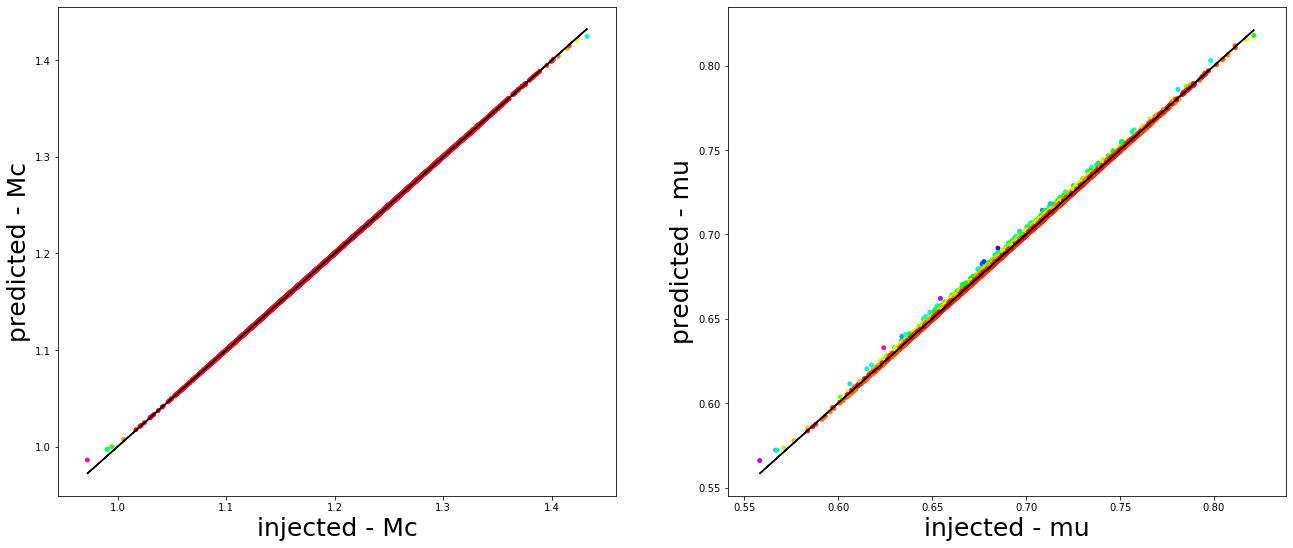

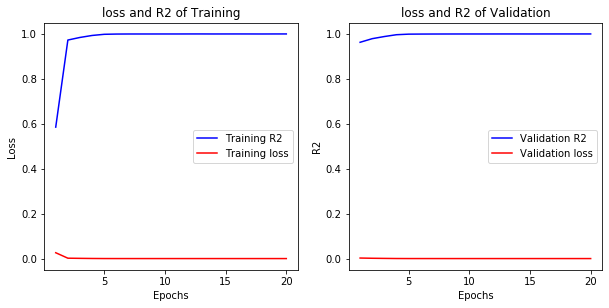

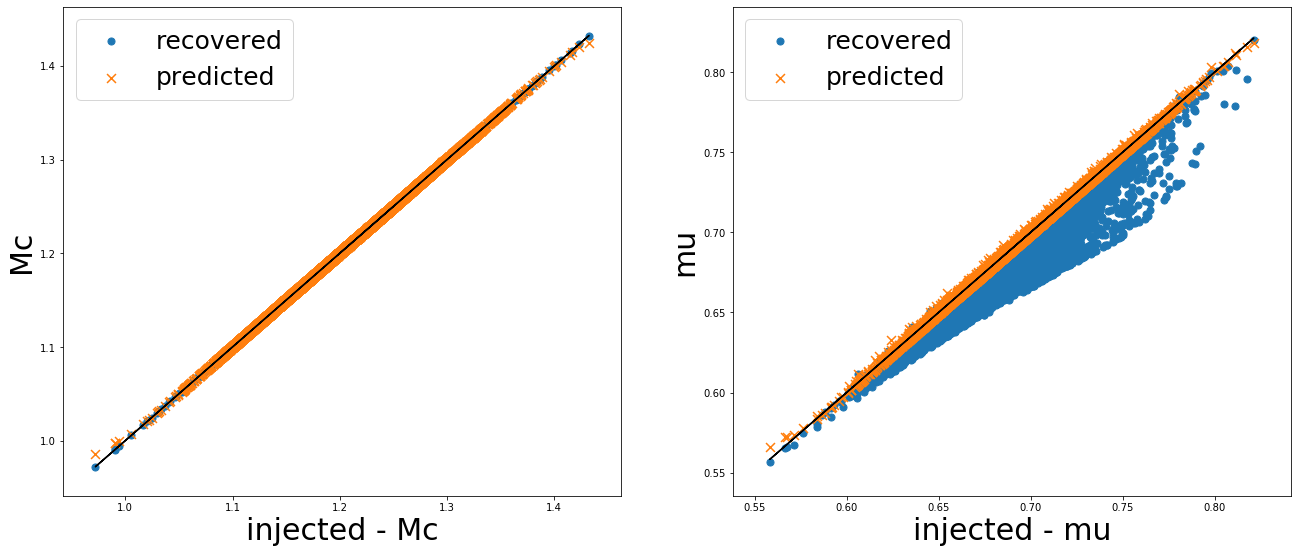

********************************************************************************
m1 vs m2: injected, recovered, predicted
********************************************************************************


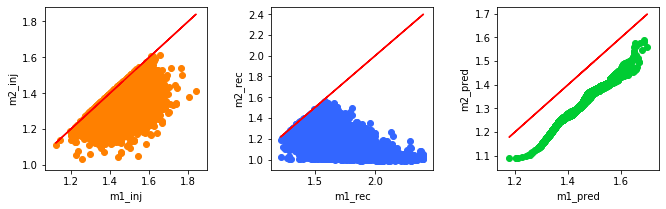

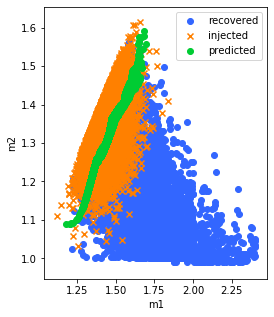

********************************************************************************
m1 vs q: injected, recovered, predicted (indirectly)
********************************************************************************


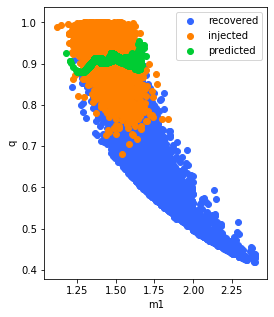

********************************************************************************
m1 vs Mc: injected, recovered, predicted
********************************************************************************


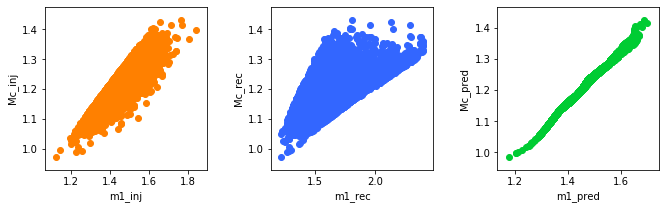

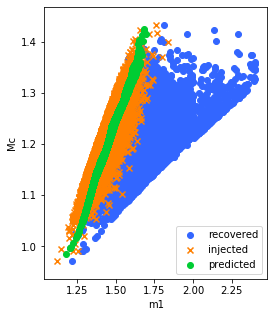

******************************************************************************** 
NaN found: 0
-----------------------------
m1 mean error: 0.0256010829838508
m2 mean error: 0.02491338009042386
Mc mean error: 0.00010783978051659669
q  mean error: 0.05006203807597194


In [19]:
if show_Mcmutest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (100,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'Mcmu_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    mc_rec_train = xtrain_notnormalized[:,2]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    mc_inj_train = ytrain_notnormalized[:,2]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    mc_rec_test  = xtest_notnormalized[:,2]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    mc_inj_test  = ytest_notnormalized[:,2]
    
    xtrain_notnorm_fp[:,0] = mc_rec_train
    xtrain_notnorm_fp[:,1] = ut.reducedMass(m1_rec_train,m2_rec_train)
    ytrain_notnorm_fp[:,0] = mc_inj_train
    ytrain_notnorm_fp[:,1] = ut.reducedMass(m1_inj_train,m2_inj_train)
    xtest_notnorm_fp[:,0]  = mc_rec_test
    xtest_notnorm_fp[:,1]  = ut.reducedMass(m1_rec_test,m2_rec_test)
    ytest_notnorm_fp[:,0]  = mc_inj_test
    ytest_notnorm_fp[:,1]  = ut.reducedMass(m1_inj_test,m2_inj_test)
    
    labels_fp = ['Mc', 'mu']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=save_plots, show=show_plots,figname=name_plots); 
    fp.plotHistory(history_fp,save=save_plots, show=show_plots,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=save_plots, show=show_plots,figname=name_plots);

    Mc_pred  = dict4.prediction_rescaled[:,0]
    mu_pred = dict4.prediction_rescaled[:,1]

    m1_pred, m2_pred= ut.findm1m2FromMcmu(Mc_pred,mu_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc ?


    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=save_plots, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    #m1error.append(m1_mean_error)
    #m2error.append(m2_mean_error)
    #mcerror.append(Mc_mean_error)
    #qerror.append(q_mean_error)

## s=m1+m2, mu=reduced mass attempt

In [20]:
if show_smutest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (100,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'smu_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    mc_rec_train = xtrain_notnormalized[:,2]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    mc_inj_train = ytrain_notnormalized[:,2]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    mc_rec_test  = xtest_notnormalized[:,2]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    mc_inj_test  = ytest_notnormalized[:,2]
    
    xtrain_notnorm_fp[:,0] = m1_rec_train+m2_rec_train
    xtrain_notnorm_fp[:,1] = ut.reducedMass(m1_rec_train,m2_rec_train)
    ytrain_notnorm_fp[:,0] = m1_inj_train+m2_inj_train
    ytrain_notnorm_fp[:,1] = ut.reducedMass(m1_inj_train,m2_inj_train)
    xtest_notnorm_fp[:,0]  = m1_rec_test+m2_rec_test
    xtest_notnorm_fp[:,1]  = ut.reducedMass(m1_rec_test,m2_rec_test)
    ytest_notnorm_fp[:,0]  = m1_inj_test+m2_inj_test
    ytest_notnorm_fp[:,1]  = ut.reducedMass(m1_inj_test,m2_inj_test)
    
    labels_fp = ['s', 'mu']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=save_plots, show=show_plots,figname=name_plots); 
    fp.plotHistory(history_fp,save=save_plots, show=show_plots,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=save_plots, show=show_plots,figname=name_plots);

    s_pred  = dict4.prediction_rescaled[:,0]
    mu_pred = dict4.prediction_rescaled[:,1]

    m1_pred, m2_pred= ut.findm1m2Fromsmu(s_pred,mu_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc ?
    Mc_pred= ut.chirpMass(m1_pred,m2_pred)

    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=save_plots, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    #m1error.append(m1_mean_error)
    #m2error.append(m2_mean_error)
    #mcerror.append(Mc_mean_error)
    #qerror.append(q_mean_error)

In [21]:
importlib.reload(ut)

<module 'utils' from '/home/simone/repos/IPAM2021_ML/algo/NN_tf/../../utils/utils.py'>

## Mc, q attempt

In [22]:
if show_Mcqtest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (100,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    mc_rec_train = xtrain_notnormalized[:,2]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    mc_inj_train = ytrain_notnormalized[:,2]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    mc_rec_test  = xtest_notnormalized[:,2]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    mc_inj_test  = ytest_notnormalized[:,2]
    
    xtrain_notnorm_fp[:,0] = mc_rec_train
    xtrain_notnorm_fp[:,1] = (m2_rec_train/m1_rec_train)
    ytrain_notnorm_fp[:,0] = mc_inj_train
    ytrain_notnorm_fp[:,1] =(m2_inj_train/m1_inj_train)
    xtest_notnorm_fp[:,0]  = mc_rec_test
    xtest_notnorm_fp[:,1]  = (m2_rec_test/m1_rec_test)
    ytest_notnorm_fp[:,0]  = mc_inj_test
    ytest_notnorm_fp[:,1]  = (m2_inj_test/m1_inj_test)
    
    labels_fp = ['Mc', 'q']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=save_plots, show=show_plots,figname=name_plots); 
    fp.plotHistory(history_fp,save=save_plots, show=show_plots,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=save_plots, show=show_plots,figname=name_plots);

    Mc_pred  = dict4.prediction_rescaled[:,0]
    q_pred = dict4.prediction_rescaled[:,1]

    m1_pred, m2_pred= ut.findm1m2FromMcq(Mc_pred,q_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc ?


    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=save_plots, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    #q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    #m1error.append(m1_mean_error)
    #m2error.append(m2_mean_error)
    #mcerror.append(Mc_mean_error)
    #qerror.append(q_mean_error)

## Mc, symmetric mass nu attempt

In [23]:
if show_Mcnutest:
#for lay in np.arange(5,305,5,dtype=int):
    epochs_fp        = 20
    hlayers_sizes_fp = (100,); 
    pcoeff           = 3
    loss_function_fp = 'mse'
    save=True
    show=False
    
    name_plots=str(hlayers_sizes_fp[0])+'_'

#    layers.append(hlayers_sizes_fp[0])
    
    xtrain_notnormalized = rdl_out['xtrain']
    ytrain_notnormalized = rdl_out['ytrain']
    xtest_notnormalized  = rdl_out['xtest']
    ytest_notnormalized  = rdl_out['ytest']
    labels               = rdl_out['labels']

    Ntrain = len(xtrain_notnormalized[:,0])
    Ntest  = len(xtest_notnormalized[:,1])
    xtrain_notnorm_fp = np.zeros((Ntrain,2))
    ytrain_notnorm_fp = np.zeros((Ntrain,2))
    xtest_notnorm_fp  = np.zeros((Ntest,2))
    ytest_notnorm_fp  = np.zeros((Ntest,2))
    
    m1_rec_train = xtrain_notnormalized[:,0]
    m2_rec_train = xtrain_notnormalized[:,1]
    mc_rec_train = xtrain_notnormalized[:,2]
    m1_inj_train = ytrain_notnormalized[:,0]
    m2_inj_train = ytrain_notnormalized[:,1]
    mc_inj_train = ytrain_notnormalized[:,2]
    m1_rec_test  = xtest_notnormalized[:,0]
    m2_rec_test  = xtest_notnormalized[:,1]
    mc_rec_test  = xtest_notnormalized[:,2]
    m1_inj_test  = ytest_notnormalized[:,0]
    m2_inj_test  = ytest_notnormalized[:,1]
    mc_inj_test  = ytest_notnormalized[:,2]
    
    xtrain_notnorm_fp[:,0] = mc_rec_train
    xtrain_notnorm_fp[:,1] = ut.symmetricMass(m1_rec_train,m2_rec_train)
    ytrain_notnorm_fp[:,0] = mc_inj_train
    ytrain_notnorm_fp[:,1] =ut.symmetricMass(m1_inj_train,m2_inj_train)
    xtest_notnorm_fp[:,0]  = mc_rec_test
    xtest_notnorm_fp[:,1]  = ut.symmetricMass(m1_rec_test,m2_rec_test)
    ytest_notnorm_fp[:,0]  = mc_inj_test
    ytest_notnorm_fp[:,1]  = ut.symmetricMass(m1_inj_test,m2_inj_test)
    
    labels_fp = ['Mc', 'nu']
    
    # train model
    t0 = time.perf_counter()
    outNN = neuralNewtorkRegression(xtrain_notnorm_fp, ytrain_notnorm_fp,
                scaler_type       = scaler_type,                   
                epochs            = epochs_fp, 
                batch_size        = batch_size, 
                learning_rate     = learning_rate,          
                validation_split  = validation_split,   
                verbose           = verbose_training,             
                hlayers_sizes     = hlayers_sizes_fp,          
                out_activation    = out_activation,        
                hidden_activation = hidden_activation,
                loss_function     = loss_function_fp
            )
    train_time = time.perf_counter()-t0

    model_fp    = outNN["model"]
    history_fp  = outNN["history"]
    Npars_fp    = outNN["Npars"]
    scaler_x_fp = outNN["scaler_x"]
    scaler_y_fp = outNN["scaler_y"]

    xtest_fp = scaler_x_fp.transform(xtest_notnorm_fp)
    ytest_fp = scaler_y_fp.transform(ytest_notnorm_fp)

    # predict
    ypredicted_fp = model_fp.predict(xtest_fp)
    print("Model trained, predictions made")
    
    # print some information
    metrics_dict_fp = ut.evalutationMetricsDict(xtest_fp,ytest_fp,model_fp)

    # show plots and print info
    asterisks = '*'*80
    print(asterisks)
    print('Layers: ', end='')
    for layer in hlayers_sizes_fp:
        print(layer,end=' ')
    print('\ntrainable paramaters: ', Npars_fp, \
          '\ntrain time: {:.3f}'.format(train_time), '\n', \
          asterisks, sep='', end='\n')
    ut.printMetrics(metrics_dict_fp)

    # save info/score/model in the dictionary
    dict4                     = lambda:0
    dict4.Npars               = Npars_fp
    dict4.metrics             = metrics_dict_fp
    dict4.train_time          = train_time
    dict4.Nlayers             = len(hlayers_sizes)
    dict4.hlayers_sizes       = hlayers_sizes_fp
    dict4.epochs              = epochs_fp
    dict4.batch_size          = batch_size
    dict4.scaler_type         = scaler_type
    dict4.out_activation      = out_activation
    dict4.hidden_activation   = hidden_activation
    dict4.learning_rate       = learning_rate
    dict4.prediction          = ypredicted_fp
    dict4.prediction_rescaled = scaler_y_fp.inverse_transform(ypredicted_fp)
    dict4.loss_function       = loss_function_fp
    dict4.scaler_x            = scaler_x_fp
    dict4.scaler_y            = scaler_y_fp
    dict4.model               = model_fp
    dict4.history             = history_fp

    # PLOTS
    fp.regrPredictionPlots(ytest_fp, ypredicted_fp, labels_fp, scaler=scaler_y_fp,save=save_plots, show=show_plots,figname=name_plots); 
    fp.plotHistory(history_fp,save=save_plots, show=show_plots,figname=name_plots);
    fp.checkRegressionPlot(xtest_fp, ytest_fp, ypredicted_fp, labels_fp, \
                       scaler_y=scaler_y_fp, scaler_x=scaler_x_fp,save=save_plots, show=show_plots,figname=name_plots);

    Mc_pred  = dict4.prediction_rescaled[:,0]
    nu_pred = dict4.prediction_rescaled[:,1]

    m1_pred, m2_pred= ut.findm1m2FromMcSymm(Mc_pred,nu_pred)

    if(np.max(m1_pred)>3.2):
        print("Warning: BH mass recovered as m1")
        
    # now check consistency between m1,m2 and Mc ?


    # check that m1 is always the biggest
    for i in range(0,len(m2_pred)):
        if m2_pred[i]>m1_pred[i]:
            tmp        = m2_pred[i]
            m2_pred[i] = m1_pred[i]
            m1_pred[i] = tmp
            #print(i, 'swapping')
    
    #PLOTS
    prediction_fp = np.column_stack((m1_pred, m2_pred, Mc_pred))
    fp.plotInjRecPred(ytest_notnormalized, xtest_notnormalized, \
                      prediction_fp, idx_Mc=2,save=save_plots, show=show_plots,figname=name_plots)
    

#    print(asterisks,'\n predicted and recovered masses vs injected with pcoeff=',\
#          pcoeff, '\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], m1_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], m2_pred, label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL p'+str(pcoeff))
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

#    print(asterisks,'\n predicted and recovered masses vs injected with standard regr\n', asterisks, sep='')
#    plt.figure
#    plt.subplot(1,2,1)
#    plt.scatter(ytest_notnormalized[:,0], xtest_notnormalized[:,0], label='recovered')
#    plt.scatter(ytest_notnormalized[:,0], dict4.prediction_rescaled[:,0], label='predicted')
#    plt.plot(ytest_notnormalized[:,0], ytest_notnormalized[:,0], 'k')
#    plt.xlabel('injected - m1')
#    plt.ylabel('m1 - GstLAL standard')
#    plt.legend()
#    plt.subplot(1,2,2)
#    plt.scatter(ytest_notnormalized[:,1], xtest_notnormalized[:,1], label='recovered')
#    plt.scatter(ytest_notnormalized[:,1], dict4.prediction_rescaled[:,1], label='predicted')
#    plt.plot(ytest_notnormalized[:,1], ytest_notnormalized[:,1], 'k')
#    plt.xlabel('injected - m2')
#    plt.ylabel('m2 - GstLAL standard')
#    plt.legend()
#    plt.subplots_adjust(wspace=0.4)
#    plt.show()

    nan_counter = 0;
    for i in range(0,len(m1_pred)):
        if np.isnan(m1_pred[i]):
            #print(p_pred[i], Mc_pred[i])
            nan_counter += 1
    print(asterisks, '\nNaN found:', nan_counter)

    # mean errors 
    m1_inj  = ytest_notnormalized[:,0]
    m2_inj  = ytest_notnormalized[:,1]
    Mc_inj  = ytest_notnormalized[:,2]
    q_inj   = m2_inj /m1_inj
    q_pred  = m2_pred/m1_pred
  
    m1_mean_error = np.mean(np.abs(m1_inj-m1_pred)/m1_inj)
    m2_mean_error = np.mean(np.abs(m2_inj-m2_pred)/m2_inj)
    Mc_mean_error = np.mean(np.abs(Mc_inj-Mc_pred)/Mc_inj)
    q_mean_error  = np.mean(np.abs(q_inj - q_pred)/q_inj )
    print('-----------------------------')
    print('m1 mean error:', m1_mean_error)
    print('m2 mean error:', m2_mean_error)
    print('Mc mean error:', Mc_mean_error)
    print('q  mean error:', q_mean_error)
    
    #m1error.append(m1_mean_error)
    #m2error.append(m2_mean_error)
    #mcerror.append(Mc_mean_error)
    #qerror.append(q_mean_error)